In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Data Preprocessing
train_df["Age"].fillna(train_df["Age"].median(), inplace=True)
train_df["Embarked"].fillna(train_df["Embarked"].mode()[0], inplace=True)
test_df["Age"].fillna(test_df["Age"].median(), inplace=True)
test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)

train_df["Pclass"] = train_df["Pclass"].astype(str)
test_df["Pclass"] = test_df["Pclass"].astype(str)

train_df["FamilySize"] = train_df["SibSp"] + train_df["Parch"] + 1
test_df["FamilySize"] = test_df["SibSp"] + test_df["Parch"] + 1
train_df["IsAlone"] = (train_df["FamilySize"] == 1).astype(int)
test_df["IsAlone"] = (test_df["FamilySize"] == 1).astype(int)

le = LabelEncoder()
for col in ["Sex", "Embarked", "Pclass"]:
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col] = le.transform(test_df[col])

In [4]:
features = ["Pclass", "Sex", "Age", "Fare", "Embarked", "FamilySize", "IsAlone"]
X = train_df[features]
y = train_df["Survived"]
X_test = test_df[features]

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))

Validation Accuracy: 0.8156424581005587

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       110
           1       0.79      0.71      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179


Confusion Matrix:
 [[97 13]
 [20 49]]


In [10]:
predictions = model.predict(X_test)
submission = pd.DataFrame({"PassengerId": test_df["PassengerId"], "Survived": predictions})
print(submission.head(20))  # print first 20 predictions

    PassengerId  Survived
0           892         0
1           893         0
2           894         0
3           895         1
4           896         1
5           897         0
6           898         0
7           899         0
8           900         1
9           901         0
10          902         0
11          903         0
12          904         1
13          905         0
14          906         1
15          907         1
16          908         0
17          909         0
18          910         0
19          911         1


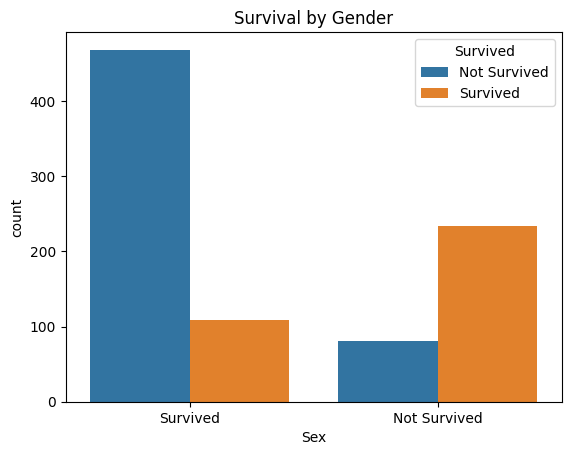

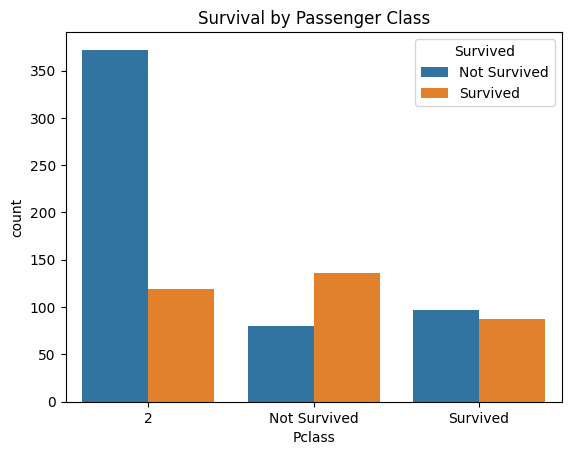

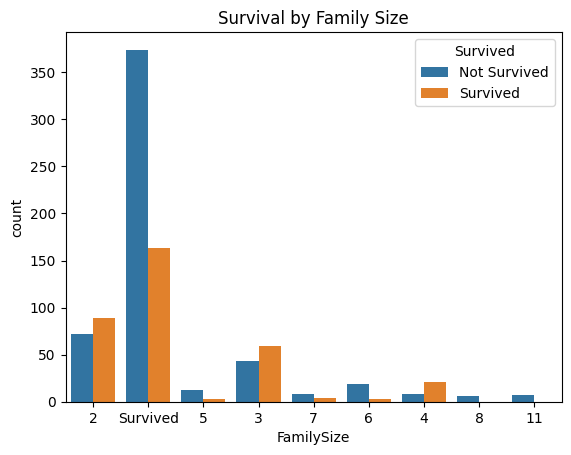

In [11]:
# Survival by Gender
sns.countplot(x="Sex", hue="Survived", data=train_df.replace({0:"Not Survived", 1:"Survived"}))
plt.title("Survival by Gender")
plt.show()

# Survival by Passenger Class
sns.countplot(x="Pclass", hue="Survived", data=train_df.replace({0:"Not Survived", 1:"Survived"}))
plt.title("Survival by Passenger Class")
plt.show()

# Survival by Family Size
sns.countplot(x="FamilySize", hue="Survived", data=train_df.replace({0:"Not Survived", 1:"Survived"}))
plt.title("Survival by Family Size")
plt.show()
